# Parse a csv file captured using Sniffer

#### Where is this code located

In [41]:
pwd

'/Users/aloswain/Downloads/Cisco/cisco_hackathon_2018'

#### Import Libraries

In [42]:
%matplotlib inline
#import matplotlib as plt
import matplotlib.pyplot as plt

In [44]:
import pandas as pd
import numpy as np

#### Load the data

In [46]:
#df = pd.read_csv('hackathon', index_col=0)
df = pd.read_csv('capture_with_rssi_channel', index_col=0, error_bad_lines=False, warn_bad_lines=False, skipfooter=1)

#print(df.head())

/Users/aloswain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.



#### Display some of the data

In [45]:
df[:11]

,Sequence number,Time,Source address,Sequence number.1,Source address.1,Transmitter address,Source,Data rate,Length,Destination,...,Partial Virtual Bitmap,Receiver address,Source address.2,Source address.3,Destination address,Protocol,Transmitter address.1,Signal [dBm],Channel,Info
No.,,,,,,,,,,,,,,,,,,,,,
1,NaN,2018-03-08 03:18:29.338087,NaN,NaN,NaN,00:81:c0:a8:01:0b,192.168.80.5,24.0,94,192.168.80.8,...,NaN,00:da:55:be:08:6f,NaN,NaN,NaN,802.11,00:81:c0:a8:01:0b,16.0,81.0,"802.11 Block Ack, Flags=........."
2,NaN,2018-03-08 03:18:29.338162,NaN,NaN,NaN,00:81:c0:a8:01:0b,192.168.80.8,24.0,122,192.168.80.5,...,NaN,00:da:55:be:08:6f,NaN,NaN,NaN,ICMP,00:81:c0:a8:01:0b,16.0,81.0,Destination unreachable (Port unreachable)
3,NaN,2018-03-08 03:18:29.338220,00:93:c0:a8:01:0a,NaN,00:93:c0:a8:01:0a,00:da:55:be:08:6f,192.168.1.10,NaN,181,192.168.1.11,...,NaN,00:81:c0:a8:01:0b,00:93:c0:a8:01:0a,00:93:c0:a8:01:0a,00:81:c0:a8:01:0b,UDP,00:da:55:be:08:6f,32.0,81.0,8000 > 9025 Len=18
4,NaN,2018-03-08 03:18:29.338241,00:93:c0:a8:01:0a,NaN,00:93:c0:a8:01:0a,00:da:55:be:08:6f,192.168.80.8,NaN,209,192.168.80.5,...,NaN,00:81:c0:a8:01:0b,00:93:c0:a8:01:0a,00:93:c0:a8:01:0a,00:81:c0:a8:01:0b,ICMP,00:da:55:be:08:6f,32.0,81.0,Destination unreachable (Port unreachable)
5,NaN,2018-03-08 03:18:29.347821,NaN,NaN,NaN,00:81:c0:a8:01:0b,192.168.80.5,24.0,94,192.168.80.8,...,NaN,00:da:55:be:08:6f,NaN,NaN,NaN,802.11,00:81:c0:a8:01:0b,16.0,81.0,"802.11 Block Ack, Flags=........."
6,NaN,2018-03-08 03:18:29.347853,NaN,NaN,NaN,00:81:c0:a8:01:0b,192.168.80.8,24.0,122,192.168.80.5,...,NaN,00:da:55:be:08:6f,NaN,NaN,NaN,ICMP,00:81:c0:a8:01:0b,16.0,81.0,Destination unreachable (Port unreachable)
7,NaN,2018-03-08 03:18:29.347956,00:93:c0:a8:01:0a,NaN,00:93:c0:a8:01:0a,00:da:55:be:08:6f,192.168.1.10,NaN,181,192.168.1.11,...,NaN,00:81:c0:a8:01:0b,00:93:c0:a8:01:0a,00:93:c0:a8:01:0a,00:81:c0:a8:01:0b,UDP,00:da:55:be:08:6f,32.0,81.0,8000 > 9025 Len=18
8,NaN,2018-03-08 03:18:29.347990,00:93:c0:a8:01:0a,NaN,00:93:c0:a8:01:0a,00:da:55:be:08:6f,192.168.80.8,NaN,209,192.168.80.5,...,NaN,00:81:c0:a8:01:0b,00:93:c0:a8:01:0a,00:93:c0:a8:01:0a,00:81:c0:a8:01:0b,ICMP,00:da:55:be:08:6f,32.0,81.0,Destination unreachable (Port unreachable)
9,NaN,2018-03-08 03:18:29.357444,NaN,NaN,NaN,00:81:c0:a8:01:0b,192.168.80.5,24.0,94,192.168.80.8,...,NaN,00:da:55:be:08:6f,NaN,NaN,NaN,802.11,00:81:c0:a8:01:0b,16.0,81.0,"802.11 Block Ack, Flags=........."


#### What are the columns

In [48]:
print(df.columns)

Index(['Sequence number', 'Time', 'Source address', 'Sequence number.1',
       'Source address.1', 'Transmitter address', 'Source', 'Data rate',
       'Length', 'Destination', 'TID', 'TID.1', 'PWR MGT',
       'Partial Virtual Bitmap', 'Receiver address', 'Source address.2',
       'Source address.3', 'Destination address', 'Protocol',
       'Transmitter address.1', 'Signal [dBm]', 'Channel', 'Info'],
      dtype='object')


#### Convert the time column to pandas datetime format

In [51]:
df['Time'] = (pd.to_datetime(df['Time'],infer_datetime_format=True))
df.head()
#x.head()

,Sequence number,Time,Source address,Sequence number.1,Source address.1,Transmitter address,Source,Data rate,Length,Destination,...,Partial Virtual Bitmap,Receiver address,Source address.2,Source address.3,Destination address,Protocol,Transmitter address.1,Signal [dBm],Channel,Info
No.,,,,,,,,,,,,,,,,,,,,,
1,NaN,2018-03-08 03:18:29.338087,NaN,NaN,NaN,00:81:c0:a8:01:0b,192.168.80.5,24.0,94,192.168.80.8,...,NaN,00:da:55:be:08:6f,NaN,NaN,NaN,802.11,00:81:c0:a8:01:0b,16.0,81.0,"802.11 Block Ack, Flags=........."
2,NaN,2018-03-08 03:18:29.338162,NaN,NaN,NaN,00:81:c0:a8:01:0b,192.168.80.8,24.0,122,192.168.80.5,...,NaN,00:da:55:be:08:6f,NaN,NaN,NaN,ICMP,00:81:c0:a8:01:0b,16.0,81.0,Destination unreachable (Port unreachable)
3,NaN,2018-03-08 03:18:29.338220,00:93:c0:a8:01:0a,NaN,00:93:c0:a8:01:0a,00:da:55:be:08:6f,192.168.1.10,NaN,181,192.168.1.11,...,NaN,00:81:c0:a8:01:0b,00:93:c0:a8:01:0a,00:93:c0:a8:01:0a,00:81:c0:a8:01:0b,UDP,00:da:55:be:08:6f,32.0,81.0,8000 > 9025 Len=18
4,NaN,2018-03-08 03:18:29.338241,00:93:c0:a8:01:0a,NaN,00:93:c0:a8:01:0a,00:da:55:be:08:6f,192.168.80.8,NaN,209,192.168.80.5,...,NaN,00:81:c0:a8:01:0b,00:93:c0:a8:01:0a,00:93:c0:a8:01:0a,00:81:c0:a8:01:0b,ICMP,00:da:55:be:08:6f,32.0,81.0,Destination unreachable (Port unreachable)
5,NaN,2018-03-08 03:18:29.347821,NaN,NaN,NaN,00:81:c0:a8:01:0b,192.168.80.5,24.0,94,192.168.80.8,...,NaN,00:da:55:be:08:6f,NaN,NaN,NaN,802.11,00:81:c0:a8:01:0b,16.0,81.0,"802.11 Block Ack, Flags=........."


In [52]:
print(df['Time'].dtype)

datetime64[ns]


In [8]:
#print(df['Time'])

In [56]:
x = df['Time']
x.head()

No.
1   2018-03-08 03:18:29.338087
2   2018-03-08 03:18:29.338162
3   2018-03-08 03:18:29.338220
4   2018-03-08 03:18:29.338241
5   2018-03-08 03:18:29.347821
Name: Time, dtype: datetime64[ns]

In [53]:
y = df['Signal [dBm]']
y.head()

No.
1    16.0
2    16.0
3    32.0
4    32.0
5    16.0
Name: Signal [dBm], dtype: float64

In [55]:
#ax = df.plot(kind='scatter', x='Time', y='Signal [dBm]', color='white', alpha=0.5, linewidth=0)
#ax.set_ylim((0, 85))
#ax.set_xlim((0, 70000))
## Specify background color for the axis/plot
#ax.set_axis_bgcolor("lightslategray")

In [11]:
type(y)

pandas.core.series.Series

In [66]:
#ts = pd.Series(y , index=x)
#ts.head()

In [67]:
#ts.plot()

In [68]:
#ts.head()

In [65]:
print((x.dtype))
print((y.dtype))

datetime64[ns]
float64


#### Plot the graph

In [72]:
#plt.plot(x, y)

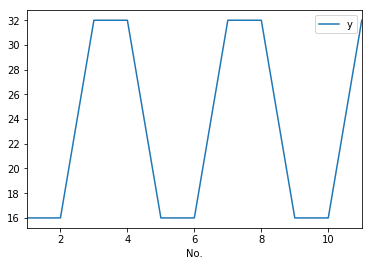

In [73]:
df1 = pd.DataFrame ({'x' : x[0:11], 'y':y[0:11]})
df1.plot()

In [75]:
#df1.set_index('x', inplace=True)
#pd.DataFrame.plot.scatter(x, y)

In [76]:
#df1.head()

In [77]:
#ax = df1.plot(kind = 'bar')
#ax.ax.set_axis_bgcolor("white")

In [27]:
#import plotly

In [83]:
import plotly.plotly as py
import plotly.graph_objs as go
#from datetime import datetime
##import pandas_datareader.data as web

In [84]:
data = [go.Scatter(x=df['Time'][0:500], y = df['Signal [dBm]'][0:500])]

py.iplot(data)